###https://blog.csdn.net/winycg/article/details/79120154

best fitness: 0.16118, mean fitness: 21.65258
best fitness: 0.16118, mean fitness: 33.86652
best fitness: 0.03260, mean fitness: 21.88847
best fitness: 0.02372, mean fitness: 21.00459
best fitness: 0.01100, mean fitness: 25.27909
best fitness: 0.00875, mean fitness: 31.16780
best fitness: 0.00477, mean fitness: 44.65904
best fitness: 0.00477, mean fitness: 31.63481
best fitness: 0.00187, mean fitness: 32.67874
best fitness: 0.00187, mean fitness: 54.90188
best fitness: 0.00119, mean fitness: 19.82735
best fitness: 0.00119, mean fitness: 29.87378
best fitness: 0.00119, mean fitness: 22.08125
best fitness: 0.00119, mean fitness: 16.87116
best fitness: 0.00119, mean fitness: 19.38738
best fitness: 0.00069, mean fitness: 16.15800
best fitness: 0.00069, mean fitness: 34.29522
best fitness: 0.00053, mean fitness: 33.42351
best fitness: 0.00030, mean fitness: 15.50721
best fitness: 0.00024, mean fitness: 10.46571
best fitness: 0.00013, mean fitness: 22.54790
best fitness: 0.00013, mean fitnes

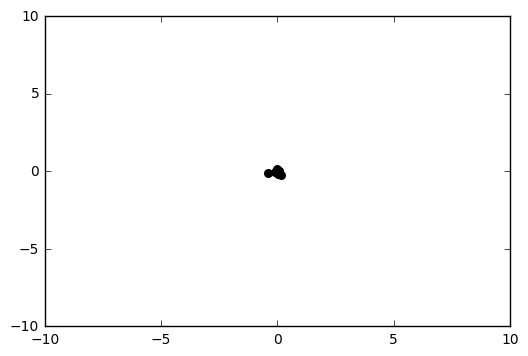

In [2]:
import numpy as np
import matplotlib.pyplot as plt
 
 
class PSO(object):
    def __init__(self, population_size, max_steps):
        self.w = 0.6  # 惯性权重
        self.c1 = self.c2 = 2
        self.population_size = population_size  # 粒子群数量
        self.dim = 2  # 搜索空间的维度
        self.max_steps = max_steps  # 迭代次数
        self.x_bound = [-10, 10]  # 解空间范围
        self.x = np.random.uniform(self.x_bound[0], self.x_bound[1],
                                   (self.population_size, self.dim))  # 初始化粒子群位置
        self.v = np.random.rand(self.population_size, self.dim)  # 初始化粒子群速度
        fitness = self.calculate_fitness(self.x)
        self.p = self.x  # 个体的最佳位置
        self.pg = self.x[np.argmin(fitness)]  # 全局最佳位置
        self.individual_best_fitness = fitness  # 个体的最优适应度
        self.global_best_fitness = np.max(fitness)  # 全局最佳适应度
 
    def calculate_fitness(self, x):
        return np.sum(np.square(x), axis=1)
 
    def evolve(self):
        fig = plt.figure()
        for step in range(self.max_steps):
            r1 = np.random.rand(self.population_size, self.dim)
            r2 = np.random.rand(self.population_size, self.dim)
            # 更新速度和权重
            self.v = self.w*self.v+self.c1*r1*(self.p-self.x)+self.c2*r2*(self.pg-self.x)
            self.x = self.v + self.x
            plt.clf()
            plt.scatter(self.x[:, 0], self.x[:, 1], s=30, color='k')
            plt.xlim(self.x_bound[0], self.x_bound[1])
            plt.ylim(self.x_bound[0], self.x_bound[1])
            plt.pause(0.01)
            fitness = self.calculate_fitness(self.x)
            # 需要更新的个体
            update_id = np.greater(self.individual_best_fitness, fitness)
            self.p[update_id] = self.x[update_id]
            self.individual_best_fitness[update_id] = fitness[update_id]
            # 新一代出现了更小的fitness，所以更新全局最优fitness和位置
            if np.min(fitness) < self.global_best_fitness:
                self.pg = self.x[np.argmin(fitness)]
                self.global_best_fitness = np.min(fitness)
            print('best fitness: %.5f, mean fitness: %.5f' % (self.global_best_fitness, np.mean(fitness)))
 
 
pso = PSO(100, 100)
pso.evolve()
plt.show()
